In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pylab as pylab
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import izip_longest
from functools import partial

In [2]:
f  = lambda x, y: 10 * np.cos(1 * x) * 15 * np.sin(0.5 * y) + 150
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [3]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [4]:
z = f(x, y)

0.99999924753344938

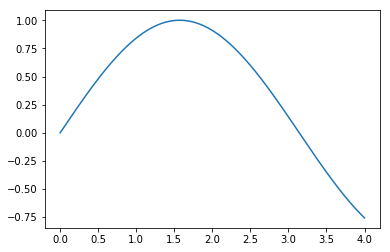

In [5]:
v = np.linspace(0, 4, 1000)  # 100 evenly-spaced values from 0 to 4
w = np.sin(v)

plt.plot(v, w)
max(w)

In [6]:
np.pi

3.141592653589793

There is a local minimia at $(\pi,\pi)$, because the $\cos(\pi)=-1:$

In [7]:
minima = np.array([np.pi, np.pi])

In [8]:
minima

array([ 3.14159265,  3.14159265])

In [9]:
f(*minima)

0.0

In [10]:
minima_ = minima.reshape(-1, 1)

In [11]:
minima_

array([[ 3.14159265],
       [ 3.14159265]])

In [12]:
f(*minima_)

array([ 0.])

In [13]:
minima_[1]

array([ 3.14159265])

In [14]:
minima_[0]

array([ 3.14159265])

### 3D Surface plot with local minima plotted as white dot:

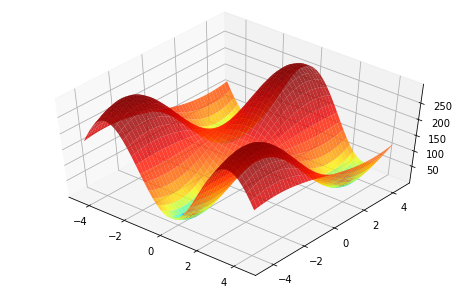

In [15]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

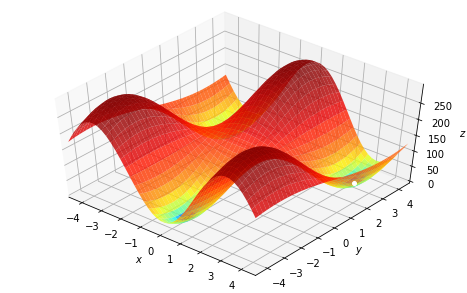

In [16]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

a,b = minima_[0], minima_[1]
ax.plot(a, b, f(a, b), 'o', markersize=4, color='w')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

### 2D Plot and Gradient Vector Field:

In [17]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

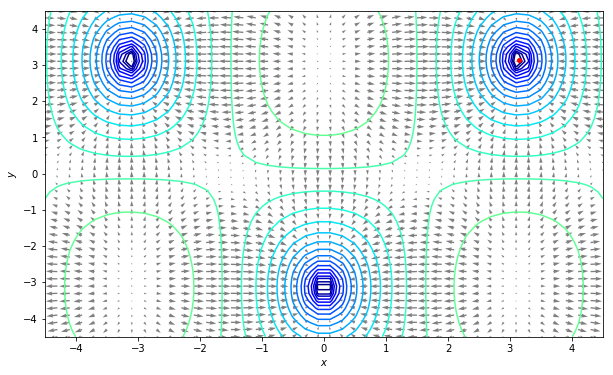

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet) # The contour plot
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5) # These are the arrow vectors
ax.plot(minima_[0], minima_[1], 'o', color='r', markersize=4) # The minima dot
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

### Gradient-based optimization:

In [21]:
x0 = np.array([0.2, 3]) # Top of a mountain
print(x0)
func = value_and_grad(lambda args: f(*args))
func

[ 0.2  3. ]


<function autograd.convenience_wrappers.value_and_grad_fun>

In [23]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20)

In [24]:
dict(res)

{'fun': 0.0,
 'jac': array([ -6.16208922e-09,  -6.30123080e-09]),
 'message': 'Optimization terminated successfully.',
 'nfev': 10,
 'nhev': 0,
 'nit': 6,
 'njev': 33,
 'status': 0,
 'success': True,
 'x': array([ 3.14159265,  3.14159265])}

In [25]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [26]:
path_ = [x0]

In [27]:
path_

[array([ 0.2,  3. ])]

In [28]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-100, callback=make_minimize_cb(path_))
# res now has obtained the Newton optimization of the path_, which was the top of the mountain to x0,
# which is the bottom.
# func is the f function.

In [29]:
path_

[array([ 0.2,  3. ]),
 array([ 2.94062721,  2.52061783]),
 array([ 3.16628002,  3.19184742]),
 array([ 3.13707425,  3.17698415]),
 array([ 3.1415941 ,  3.14158824]),
 array([ 3.14159265,  3.14159265]),
 array([ 3.14159265,  3.14159265])]

In [30]:
dict(res)

{'fun': 0.0,
 'jac': array([ -6.16208922e-09,  -6.30123080e-09]),
 'message': 'Optimization terminated successfully.',
 'nfev': 10,
 'nhev': 0,
 'nit': 6,
 'njev': 33,
 'status': 0,
 'success': True,
 'x': array([ 3.14159265,  3.14159265])}

In [31]:
print(path_)
path=np.array(path_).T

[array([ 0.2,  3. ]), array([ 2.94062721,  2.52061783]), array([ 3.16628002,  3.19184742]), array([ 3.13707425,  3.17698415]), array([ 3.1415941 ,  3.14158824]), array([ 3.14159265,  3.14159265]), array([ 3.14159265,  3.14159265])]


In [32]:
print(path)
path.shape

[[ 0.2         2.94062721  3.16628002  3.13707425  3.1415941   3.14159265
   3.14159265]
 [ 3.          2.52061783  3.19184742  3.17698415  3.14158824  3.14159265
   3.14159265]]


(2L, 7L)

### Static quiver plot of path on contour:

(-4.5, 4.5)

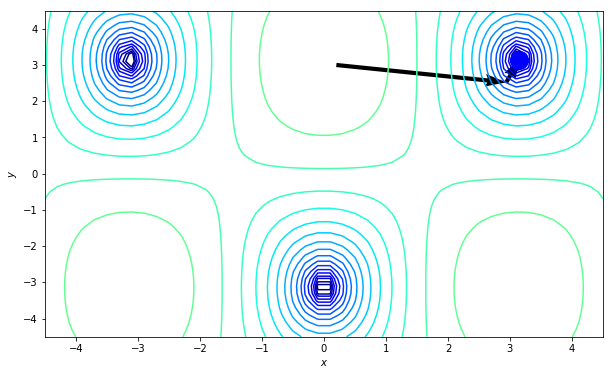

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], 
          scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(minima_[0], minima_[1], 'o', color="b", markersize=18)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


### Static quiver on 3D surface plot:

(-4.5, 4.5)

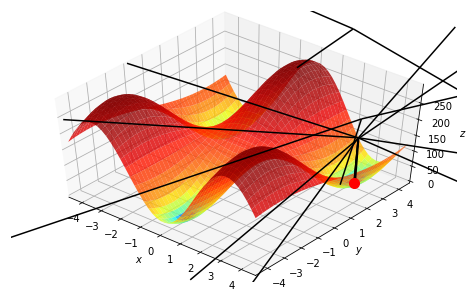

In [35]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k')

ax.plot(minima_[0], minima_[1], f(*minima_), 'o', color='r', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


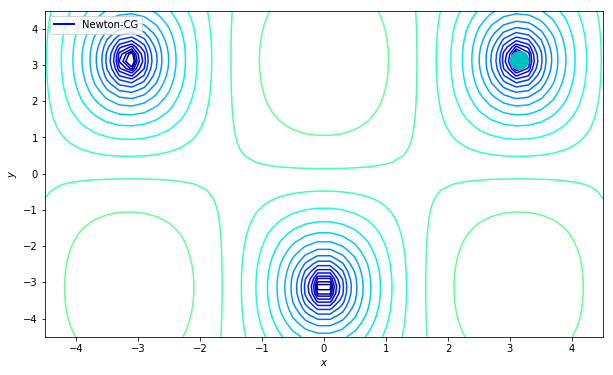

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(minima_[0], minima_[1], 'o', color = 'c', markersize=18)
line, = ax.plot([], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')


In [42]:
def init():
    line.set_data([],[])
    point.set_data([],[])
    return line, point

In [43]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [44]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=600, 
                               repeat_delay=1000, blit=True)

In [45]:
HTML(anim.to_html5_video())

In [46]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point


(-4.5, 4.5)

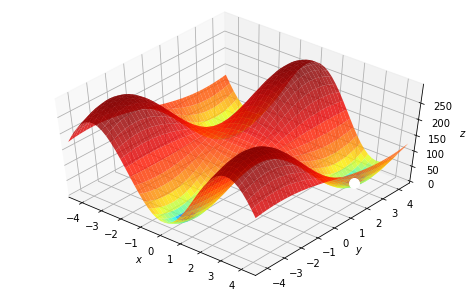

In [49]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(minima_[0], minima_[1], f(*minima_), 'o', color='w', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


In [50]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

In [51]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=600, 
                               repeat_delay=10000, blit=True)

HTML(anim.to_html5_video())